In [1]:
# AI for Medical Data Security: Data Preprocessing



In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
dataset = pd.read_csv('insurance.csv')
dataset.head()


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
dataset.info()
dataset.describe()
# Checking the  missing values in each column
dataset.isnull().sum()
# Display unique values in categorical columns
for column in dataset.select_dtypes(include=['object']).columns:
    print(f'{column}: {dataset[column].unique()}')
    


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
sex: ['female' 'male']
smoker: ['yes' 'no']
region: ['southwest' 'southeast' 'northwest' 'northeast']


In [5]:
dataset_cleaned = dataset.dropna()


In [6]:
dataset_cleaned = dataset.dropna(axis=1)

In [8]:
dataset_cleaned.info()
dataset_cleaned.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


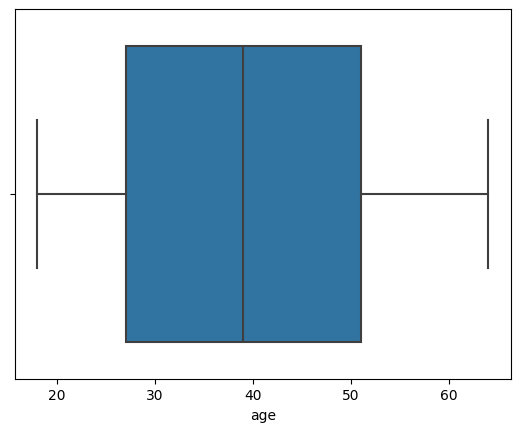

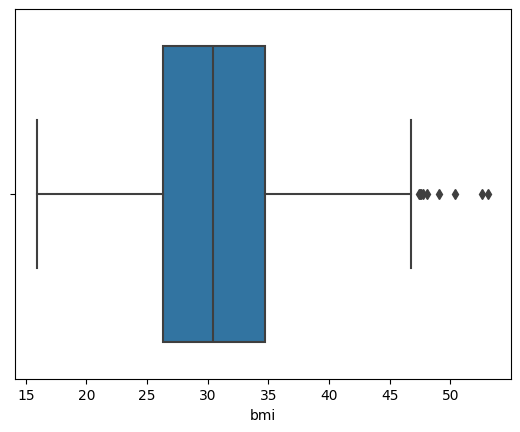

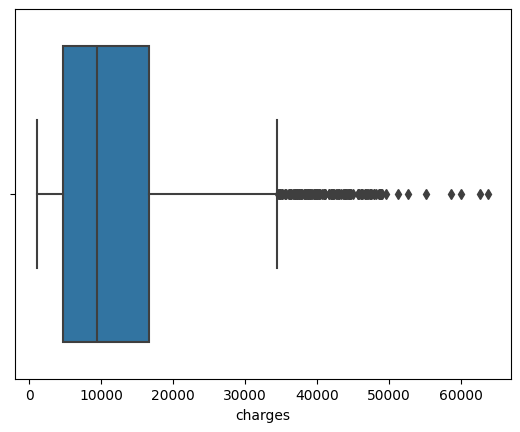

In [9]:
sns.boxplot(x=dataset_cleaned['age'])
plt.show()

sns.boxplot(x=dataset_cleaned['bmi'])
plt.show()

sns.boxplot(x=dataset_cleaned['charges'])
plt.show()

In [10]:
dataset_cleaned_encoded = pd.get_dummies(dataset_cleaned, columns=['sex', 'smoker', 'region'])
dataset_cleaned_encoded.head()


,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,True,False,False,True,False,False,False,True
1,18,33.770,1,1725.55230,False,True,True,False,False,False,True,False
2,28,33.000,3,4449.46200,False,True,True,False,False,False,True,False
3,33,22.705,0,21984.47061,False,True,True,False,False,True,False,False
4,32,28.880,0,3866.85520,False,True,True,False,False,True,False,False


In [11]:
duplicates = dataset_cleaned_encoded.duplicated().sum()
dataset_cleaned_encoded = dataset_cleaned_encoded.drop_duplicates()
print(f"Number of duplicate rows: {duplicates}")


Number of duplicate rows: 1


In [12]:
dataset_cleaned_encoded.info()
dataset_cleaned_encoded.describe()

<class 'pandas.core.frame.DataFrame'>
Index: 1337 entries, 0 to 1337
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               1337 non-null   int64  
 1   bmi               1337 non-null   float64
 2   children          1337 non-null   int64  
 3   charges           1337 non-null   float64
 4   sex_female        1337 non-null   bool   
 5   sex_male          1337 non-null   bool   
 6   smoker_no         1337 non-null   bool   
 7   smoker_yes        1337 non-null   bool   
 8   region_northeast  1337 non-null   bool   
 9   region_northwest  1337 non-null   bool   
 10  region_southeast  1337 non-null   bool   
 11  region_southwest  1337 non-null   bool   
dtypes: bool(8), float64(2), int64(2)
memory usage: 62.7 KB


,age,bmi,children,charges
count,1337.000000,1337.000000,1337.000000,1337.000000
mean,39.222139,30.663452,1.095737,13279.121487
std,14.044333,6.100468,1.205571,12110.359656
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.290000,0.000000,4746.344000
50%,39.000000,30.400000,1.000000,9386.161300
75%,51.000000,34.700000,2.000000,16657.717450
max,64.000000,53.130000,5.000000,63770.428010


In [13]:
dataset_cleaned_encoded.to_csv('cleaned_data.csv', index=False)